In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/data.csv'
df = pd.read_csv(data_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,13.6,19.599,10.435,2.068,7.936,1.943,2.938,86.582,8.482518927
0,9.4,12.531,6.301,3.150,10.003,2.477,2.317,40.537,6.521799
1,7.6,11.188,4.934,3.664,11.287,2.653,3.862,32.869,6.171909
2,6.1,9.701,4.113,4.465,12.667,2.897,4.569,25.476,5.944111
3,11.5,12.275,7.416,1.821,4.170,2.227,3.156,61.943,6.968568
4,8.5,7.281,4.460,2.604,5.186,2.721,2.408,31.965,5.666081


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X.head()

,13.6,19.599,10.435,2.068,7.936,1.943,2.938,86.582
0,9.4,12.531,6.301,3.150,10.003,2.477,2.317,40.537
1,7.6,11.188,4.934,3.664,11.287,2.653,3.862,32.869
2,6.1,9.701,4.113,4.465,12.667,2.897,4.569,25.476
3,11.5,12.275,7.416,1.821,4.170,2.227,3.156,61.943
4,8.5,7.281,4.460,2.604,5.186,2.721,2.408,31.965


In [ ]:
y.head()

,8.482518927
0,6.521799
1,6.171909
2,5.944111
3,6.968568
4,5.666081


In [ ]:
X = np.asarray(X)
y = np.asarray(y)

In [ ]:
split_percent = 0.7
split_index = int(len(X)*split_percent)

In [ ]:
num_samples = X.shape[0]

X_min = np.min(X,axis=0)
X_max = np.max(X,axis=0)

y_min = np.min(y,axis=0)
y_max = np.max(y,axis=0)

X_scaled = (X-X_min)/(X_max-X_min)
y_scaled = (y-y_min)/(y_max-y_min)

In [ ]:
X_train = X_scaled[:split_index]
y_train = y_scaled[:split_index]

X_test = X_scaled[split_index:]
y_test = y_scaled[split_index:]

In [ ]:
print(f'X_train_shape = {X_train.shape}')
print(f'y_train_shape = {y_train.shape}')
print(f'X_test_shape = {X_test.shape}')
print(f'y_test_shape = {y_test.shape}')

X_train_shape = (56, 8)
y_train_shape = (56,)
X_test_shape = (25, 8)
y_test_shape = (25,)


# Errors

In [ ]:
#------------------------------------------------------------------------------------------------------------------------------
# Cost Function
#------------------------------------------------------------------------------------------------------------------------------
def l2_regularized_cost_function(features, target, weights, reg_param):
    predictions = features @ weights
    mse_term = np.sum((predictions - target)**2) / (2 * len(target))
    reg_term = reg_param * np.sum(weights**2) / (2 * len(target))
    return mse_term + reg_term
#------------------------------------------------------------------------------------------------------------------------------
# Batch Gradient Descent
#------------------------------------------------------------------------------------------------------------------------------
def batch_gradient_descent_l2(X, y, theta, lr, iterations, lambda_val):
    cost_records = np.empty(iterations)
    m = len(y)
    for epoch in range(iterations):
        y_hat = X @ theta
        theta = theta * (1 - (lr*lambda_val)/m) - (lr/m) * (X.T @ (y_hat - y))
        cost_records[epoch] = l2_regularized_cost_function(X, y, theta, lambda_val)
    return theta, cost_records
#------------------------------------------------------------------------------------------------------------------------------
# Stochastic Gradient Descent
#------------------------------------------------------------------------------------------------------------------------------
def stochastic_gradient_descent_l2(X, y, weights, learn_rate, epochs, lambda_):
    cost_history = np.zeros(epochs)
    for i in range(iters):
      rand_index = np.random.randint(len(y)-1)
      ind_x = X[rand_index:rand_index+1]
      ind_y = y[rand_index:rand_index+1]
      weights = weights*(1-alpha*lamb) - alpha * np.dot((np.dot(ind_x,weights.T) - ind_y), ind_x)
      cost_history[iter] = l2_regularized_cost_function(X_sample, y_sample, weights, lambda_)
    return weights, cost_history
#------------------------------------------------------------------------------------------------------------------------------
# MB Gradient Descent
#------------------------------------------------------------------------------------------------------------------------------
def mini_batch_gradient_descent_l2(X, y, params, alpha, cycles, batch, reg):
    cost_history = np.empty(cycles)
    for cycle in range(cycles):
        start_idx = np.random.randint(len(y)-batch)
        X_batch = X[start_idx:start_idx+batch]
        y_batch = y[start_idx:start_idx+batch]
        grad = X_batch.T @ (X_batch @ params - y_batch) / batch
        params = params*(1 - (alpha*reg)/batch) - alpha*grad
        cost_history[cycle] = l2_regularized_cost_function(X_batch, y_batch, params, reg)
    return params, cost_history
#------------------------------------------------------------------------------------------------------------------------------
# Mean Absolute Error
#------------------------------------------------------------------------------------------------------------------------------
def mae(Ypred, Yact):
  sum_error=abs(Yact - Ypred)
  ma=sum(sum_error)/Ypred.shape[0]
  return ma
#------------------------------------------------------------------------------------------------------------------------------
# Mean Square Error
#------------------------------------------------------------------------------------------------------------------------------
def mse(Ypred, Yact):
  for i in range(Ypred.shape[0]):
    sum_error=(Yact - Ypred)**2
  ms=sum(sum_error)/Ypred.shape[0]
  return ms
#------------------------------------------------------------------------------------------------------------------------------
# R Squared
#------------------------------------------------------------------------------------------------------------------------------
def r_squared(true_values, estimates):
    total_variation = np.sum((true_values - np.mean(true_values))**2)
    unexplained_variation = np.sum((true_values - estimates)**2)
    return 1 - (unexplained_variation / total_variation)
#------------------------------------------------------------------------------------------------------------------------------
# Correlation Coefficient
#------------------------------------------------------------------------------------------------------------------------------
def correcoff(predicted, actual):
    mean_pred = np.mean(predicted)
    mean_actual = np.mean(actual)
    numerator = np.sum((actual - mean_actual) * (predicted - mean_pred))
    denominator = np.sqrt(np.sum((actual - mean_actual)**2)) * np.sqrt(np.sum((predicted - mean_pred)**2))
    return numerator / denominator

# Error Function and Graph

In [ ]:
def cal(X_test,y_test,weight):
  print("WEIGHT VECTOR",weight)
  y_pred=X_test.dot(weight.T)

  Xmin = np.min(X_test,axis=0)
  Xmax = np.max(X_test,axis=0)

  ymin = np.min(y_test,axis=0)
  ymax = np.max(y_test,axis=0)

  y_pred_unscaled=(y_pred*(ymax-ymin))+ymin
  y_test_unscaled=(y_test*(ymax-ymin))+ymin

  print("MEAN ABSOLUTE ERROR",mae(y_test_unscaled,y_pred))
  print("MEAN SQUARE ERROR",mse(y_test_unscaled,y_pred))
  print("R SQUARED",r_squared(y_test_unscaled,y_pred))
  print("CORRELATION COEFFICIENT",correcoff(y_pred,y_test_unscaled))

  plt.figure(figsize=(8, 6))
  plt.plot(y_test_unscaled, label='Actual Output', color='blue', marker='o')
  plt.plot(y_pred_unscaled, label='Predicted Output', color='red', marker='x')
  plt.xlabel('Sample Index')
  plt.ylabel('Output Value')
  plt.title('Predicted vs Actual Output (Line Plot)')
  plt.legend()
  plt.show()

In [ ]:
w= np.zeros((X_scaled.shape[1]))
w.shape
(9,)

(9,)

# Batch Gradient Descent

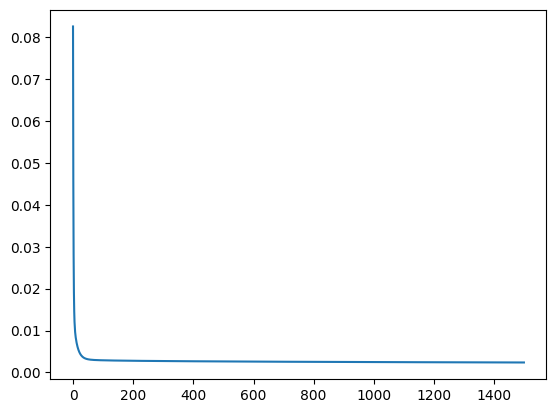

WEIGHT VECTOR [ 0.52926423  0.75978958  0.05203503  0.04854756  0.05578693  0.13049652
  0.18870139 -0.00091818]
MEAN ABSOLUTE ERROR 0.10628919445818169
MEAN SQUARE ERROR 0.021000434502594124
R SQUARED 0.5857172703367197
CORRELATION COEFFICIENT 0.8039738089004891


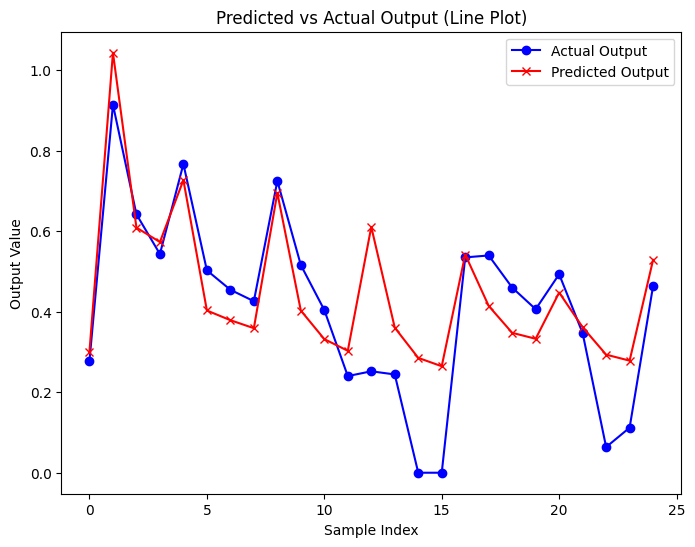

In [ ]:
alpha = 0.4
iters = 1500
lamb = 0.001
batch_weight,batch_J_history = batch_gradient_descent_l2(X_train,y_train,w,alpha,iters, lamb)
plt.plot(range(iters),batch_J_history)
plt.show()
cal(X_test,y_test,batch_weight)

# Stochastic Gradient Descent

In [ ]:
alpha=0.4
iters=5000
lamb=0.002
sto_weight,sto_J_hist = stochastic_gradient_descent_l2(X_train,y_train,w,alpha, iters,lamb)
plt.plot(range(iters),sto_J_hist)
plt.show()
cal(X_test,y_test,sto_weight)

NameError: name 'X_sample' is not defined

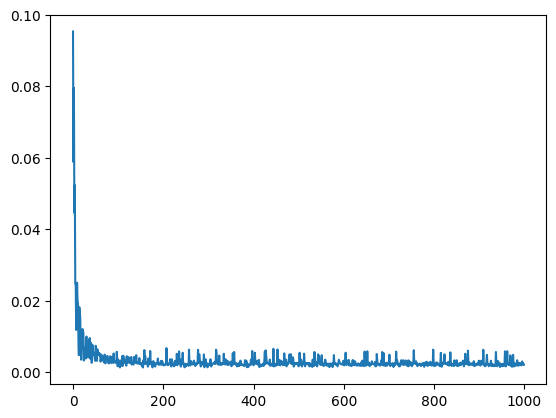

WEIGHT VECTOR [0.46091724 0.53924839 0.33229605 0.12426757 0.04272486 0.17076371
 0.1592951  0.15788913]
MEAN ABSOLUTE ERROR 0.12955851540159943
MEAN SQUARE ERROR 0.032741441703670195
R SQUARED 0.35409841922879715
CORRELATION COEFFICIENT 0.7787400853461596


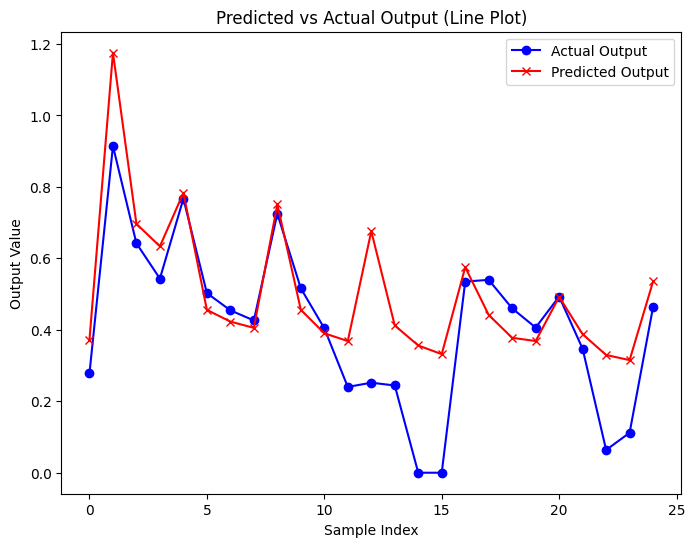

In [ ]:
alpha=0.2
iters=1000
lamb=0.001
batch_size=14
mb_w_l1,J_mb_l1 = mini_batch_gradient_descent_l2(X_train,y_train,w,alpha,iters, batch_size,lamb)
plt.plot(range(iters),J_mb_l1)
plt.show()
cal(X_test,y_test,mb_w_l1)